<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px; margin-top:25px;">
    <div style="float:right;">
        <a href="https://www.asg.ed.tum.de/en/lmf" title="Home">
            <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logo_of_the_Technical_University_of_Munich.svg" alt="Technical University of Munich" style="height: 42px">
        </a>
    </div>
    <div>
        <ul style="padding: 0pt; margin: 0pt; list-style-type: none;">
            <li> <a href="https://www.asg.ed.tum.de/en/lmf/" title="Home Chair of Remote Sensing Technology" style="text-decoration: none;">Chair of Remote Sensing Technology</a></li>
            <li> <a href="https://www.ed.tum.de/en/" title="Home TUM School of Engineering and Design" style="text-decoration: none;">TUM School of Engineering and Design</a></li>
            <li> <a href="https://www.tum.de/en/" title="Home Technical University of Munich" style="text-decoration: none;"> Technical University of Munich </a></li>
        </ul>
    </div>
</div>

<div style="font-family: Arial,sans-serif; font-size: 14px; line-height: 16px; margin-top:50px; display: flow-root">
    <div style="float:left;">
        <h1>Remote Sensing Sensors</h1>
        <p style="font-size:large">Summer Term 2024</p>
    </div>
    <div style="float:right;">
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. </span><br />
        <b>Michael Einder</b>
        </p>
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. habil.</span><br />
        <b>Marco Körner</b>
        </p>
        <p>
        <span style="font-size:small">Dr.-Ing.</span><br />
        <b>Giorgio Gomba</b>
        </p>
    </div>
    <p style="clear: both;"></p>
</div>

---

## 0. Math Recap



In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
import pandas as pd

from ipywidgets import interact, widgets

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # or 'png', 'retina', 'jpeg', 'pdf'

plt.rcParams.update({
    # "text.usetex": True,
    # "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb,mathtools,upgreek}",
    # "font.family": "sans-serif",
    # "font.sans-serif": 'Computer Modern roman',
    "font.size": 12,
    "figure.figsize": (12,12),
})

# Basic Definitions

A _complex number_ $c=a+\mathrm{i}b \in \mathbb{C} = \mathbb{R}^2$ consists of _real part_ $\mathcal{R}(c)=a$, an _imaginary part_ $\mathcal{I}(c)=b$, and the _imaginary unit_ $\mathrm{i}^2=-1$.
In some contexts, the imaginary unit is denoted with $\mathrm{j}$, so does Python.

In Python, complex numbers can be created directly or through the built-in `complex` constructor.

In [3]:
a = 1.5
b = 0.8
c = a + b*1j
print(c)

c2 = complex(a,b)
print(c2)

(1.5+0.8j)
(1.5+0.8j)


While the `math` library shipped with Python offers basic functionality, using additional libraries (`numpy`, `scipy`, ...) might be a good idea.

In [4]:
import numpy as np

print(np.real(c))
print(np.imag(c))

1.5
0.8


# Visualization

As complex numbers are represented by pairs of numbers, they can be easily visualized in the _complex plane_, where the vector coefficients are the real and imaginary parts.
Alternatively, a complex number can be described in the _polar plane_ by its _phase angle_ $\theta = \tan^{-1}(b,a)$ and radius $r = |c| = \sqrt(a^2 + b^2)$ .

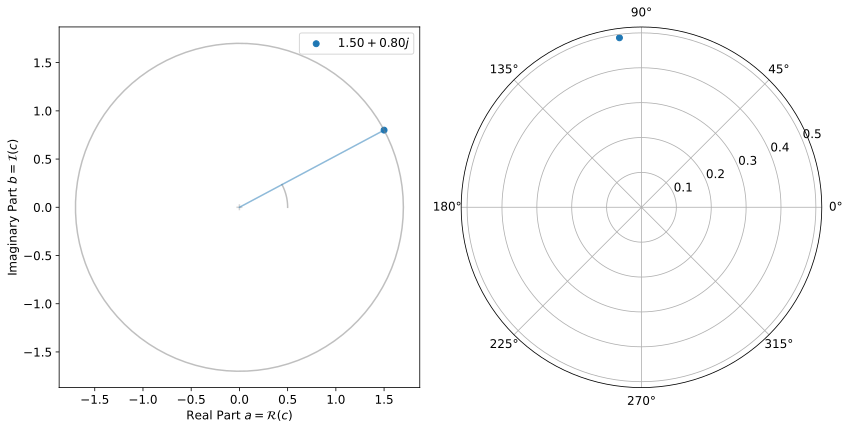

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline


def plotComplex(C, drawUnitCircle = False):
    # _, axs = plt.subplots(1,2)
    _, axd = plt.subplot_mosaic(
        "AB",
        per_subplot_kw={
            "B": {"projection": "polar"},
        },
    )
    
    axs = [ax for ax in axd.values()]

    for c in C:
        if drawUnitCircle:
            r=np.abs(c)
            t=np.angle(c)
            axs[0].plot(r * np.cos(np.linspace(0, 2 * np.pi, 100)), 
                        r * np.sin(np.linspace(0, 2 * np.pi, 100)), 
                        alpha=.5, c='gray')
            axs[0].plot(.5 * np.cos(np.linspace(0, t, 100)), 
                        .5 * np.sin(np.linspace(0, t, 100)), 
                        alpha=.5, c='gray')
            axs[0].plot([0,c.real], [0, c.imag], '-', alpha=.5)
            
        axs[0].scatter(c.real, c.imag, label=f'${c:.2f}$')

        axs[1].scatter(np.abs(c), np.angle(c))
        
    axs[0].scatter(0,0,marker='+',c='lightgray')
        
    axs[0].set_aspect('equal', 'box')
    axs[0].set_xlabel('Real Part $a=\\mathcal{R}(c)$');
    axs[0].set_ylabel('Imaginary Part $b=\\mathcal{I}(c)$');
    
    plt.tight_layout()
    
    return axs

axs = plotComplex([c], drawUnitCircle=True)
axs[0].legend();

## Operations on Complex Numbers

Two complex numbers can be added by adding their components: $c = c_1 + c_2 = (a_1 + a_2) + (b_1 + b_2)\mathrm{i}$.

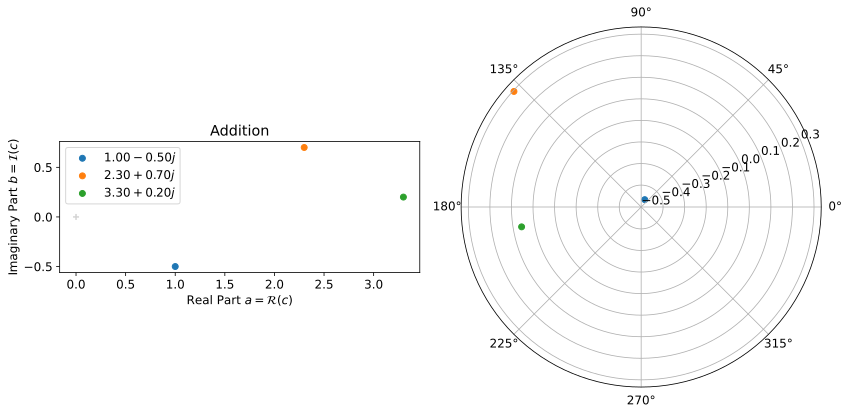

In [6]:
c1 = 1.0 - 0.5j
c2 = 2.3 + 0.7j

axs = plotComplex([c1, c2, c1 + c2])
axs[0].set_title('Addition');
axs[0].legend();

Their multiplication is defined by $c =c_1 \cdot c_2 = (a_1 + b_1 \mathrm{i}) \cdot (a_2 + b_2 \mathrm{i}) = (a_1 a_2 - b_1 b_2) + (a_1 b_2 + b_1 a_2)\mathrm{i}$.

Geometrically, this product can be derived in polar representation as 
$$
\begin{align}
  \theta &= \theta_1 + \theta_2 \\
  r &= r_1 \cdot r_2
\end{align}
$$

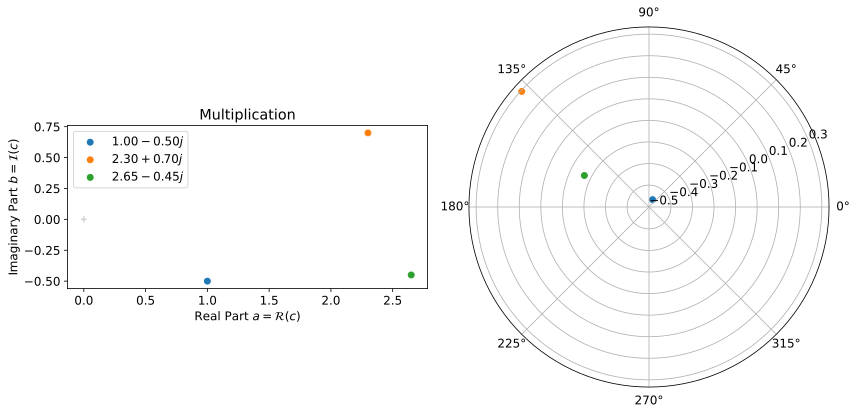

In [7]:
axs = plotComplex([c1, c2, c1 * c2])
axs[0].set_title('Multiplication');
axs[0].legend();

The _complex conjugate_ of a complex number is defined as $\bar{c} = a - b\mathrm{i}$.

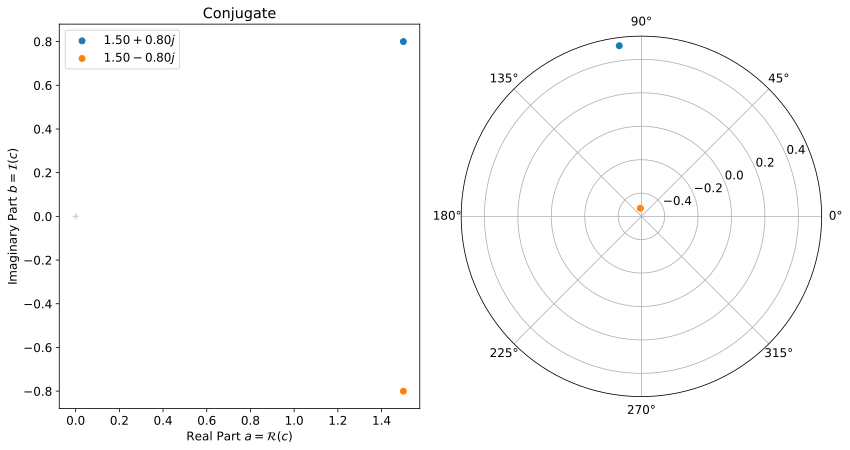

In [8]:
axs = plotComplex([c, c.conjugate()])
axs[0].set_title('Conjugate');
axs[0].legend();

The _inverse_ of a complex number $|c| \neq 0$ is $c^{-1} = \frac{a}{|c|^2} + \mathrm{i} \frac{-b}{|c|^2} = \frac{\bar{c}}{|c|^2}$.

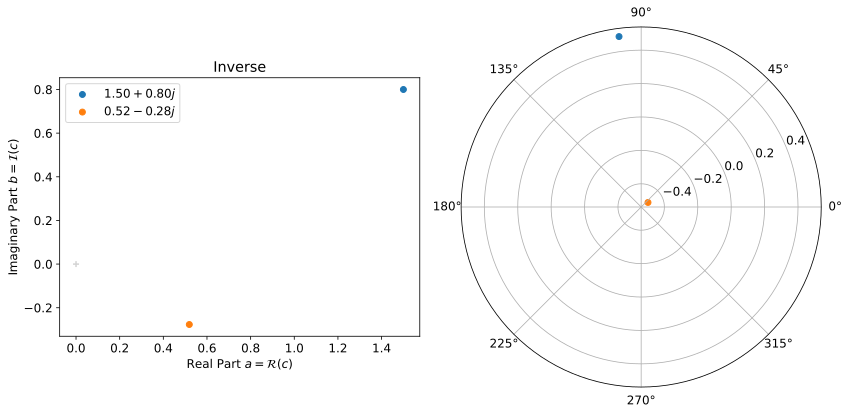

In [9]:
axs = plotComplex([c, c.conjugate()/(abs(c)**2)])
axs[0].set_title('Inverse');
axs[0].legend();

Using this inverse, the _division_ or _quotient_ of two complex number can be defined as $\frac{c_1}{c_2} = c_1 \cdot c_2^{-1} = \frac{c_1 \cdot \bar{c_2}}{|c|^2}$.

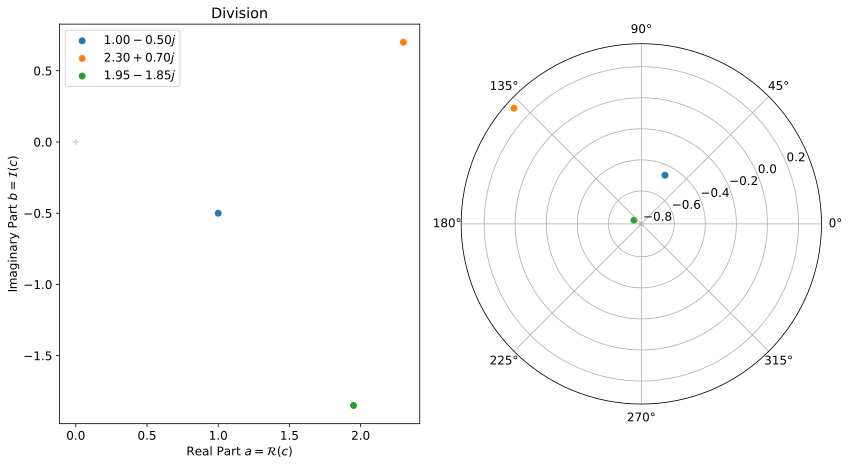

In [10]:
axs = plotComplex([c1, c2, c1 * c2.conjugate()])
axs[0].set_title('Division');
axs[0].legend();